# Trab Regressão Multivariada

In [29]:
import pandas as pd
dataframe = pd.read_csv("dados_regressao_mult.csv")

## Interepretando o Dataset

In [30]:
dataframe.head()

,matr_aluno,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
0,20242510284,50.0,177.0,M,91.0,7.0,4.0,45.0,1.0,12.0,2.0,4.0,4.0,Vila Velha
1,20242510285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20242510286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20242510287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20242510288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(dataframe.shape)

(188, 14)


In [32]:
dataframe.describe()

,matr_aluno,idade,altura (cm),peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes
count,1.880000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,135.000000
mean,2.024251e+10,35.477612,174.134328,83.811194,6.906716,3.216418,52.097015,1.149254,9.955224,2.400746,2.395522,3.837037
std,5.511140e+01,8.174522,8.117364,18.728374,0.934244,1.885289,28.239276,0.482903,2.241494,0.926429,2.048358,0.812288
min,2.024251e+10,22.000000,155.000000,52.500000,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,2.000000
25%,2.024251e+10,29.250000,170.000000,71.250000,6.000000,2.000000,40.000000,1.000000,8.000000,2.000000,1.000000,3.000000
50%,2.024251e+10,34.000000,174.000000,82.000000,7.000000,3.000000,60.000000,1.000000,10.000000,2.000000,2.000000,4.000000
75%,2.024251e+10,39.000000,179.000000,95.000000,7.500000,5.000000,60.000000,1.000000,12.000000,3.000000,4.000000,4.000000
max,2.024251e+10,62.000000,197.000000,180.000000,9.000000,7.000000,180.000000,3.000000,16.000000,6.000000,10.000000,7.000000


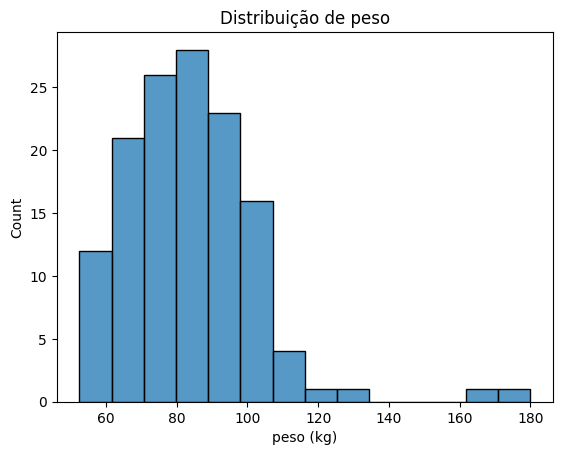

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Distribuição de peso")
sns.histplot(dataframe["peso (kg)"])
plt.show()

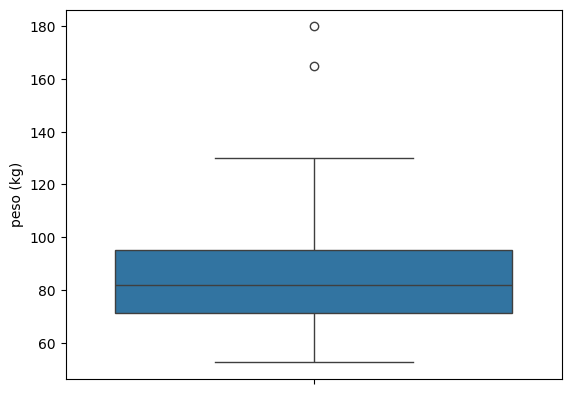

In [34]:
sns.boxplot(data=dataframe, y='peso (kg)')
plt.show()

### Onde há valores nulos?


In [35]:
print(dataframe.isnull().sum())

matr_aluno         0
idade             54
altura (cm)       54
sexo              54
peso (kg)         54
sono_h            54
exercicio_dias    54
exercicio_min     54
alimentacao       54
sedentario_h      54
agua_L            54
cafe_xic          54
refeicoes         53
polo              54
dtype: int64


## Tratando os dados

In [36]:
# Removendo os outliers
dataframe = dataframe[dataframe["peso (kg)"] < 120]

import numpy as np
# Removendo valores nulos
dataframe.replace("", np.nan, inplace=True)
dataframe = dataframe.dropna(subset=["peso (kg)"])
# Porém, como eu filtrei pelo peso, automaticamente eu já removi os valores nulos,
# mas deixei aqui apenas para fins didáticos.

In [37]:
print(dataframe.shape)

(130, 14)


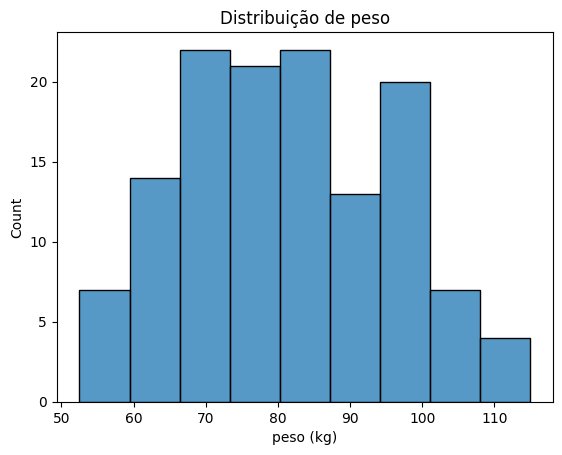

In [38]:
plt.title("Distribuição de peso")
sns.histplot(dataframe["peso (kg)"])
plt.show()

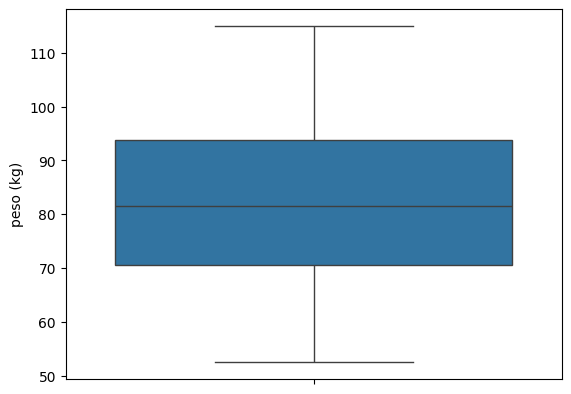

In [39]:
sns.boxplot(data=dataframe, y='peso (kg)')
plt.show()

In [40]:
print(dataframe.isnull().sum())

matr_aluno        0
idade             0
altura (cm)       0
sexo              0
peso (kg)         0
sono_h            0
exercicio_dias    0
exercicio_min     0
alimentacao       0
sedentario_h      0
agua_L            0
cafe_xic          0
refeicoes         0
polo              1
dtype: int64


### Removendo colunas

In [41]:
# A matricula não impacta em nada
dataframe.drop(columns=["matr_aluno"], inplace=True)

### Convertendo valores String

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataframe["sexo"] = label_encoder.fit_transform(dataframe["sexo"])
dataframe["polo"] = label_encoder.fit_transform(dataframe["polo"])

In [43]:
dataframe.head()

,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
0,50.0,177.0,1,91.0,7.0,4.0,45.0,1.0,12.0,2.0,4.0,4.0,3
5,47.0,176.0,1,72.0,8.0,3.0,50.0,1.0,7.0,2.0,1.0,4.0,0
6,43.0,176.0,1,115.0,6.0,3.0,60.0,1.0,12.0,3.0,2.0,3.0,2
7,39.0,175.0,1,112.0,7.0,2.0,50.0,1.0,12.0,2.0,4.0,4.0,2
8,26.0,183.0,1,99.0,8.0,2.0,60.0,1.0,10.0,3.0,3.0,4.0,4


## Verificando as correlações

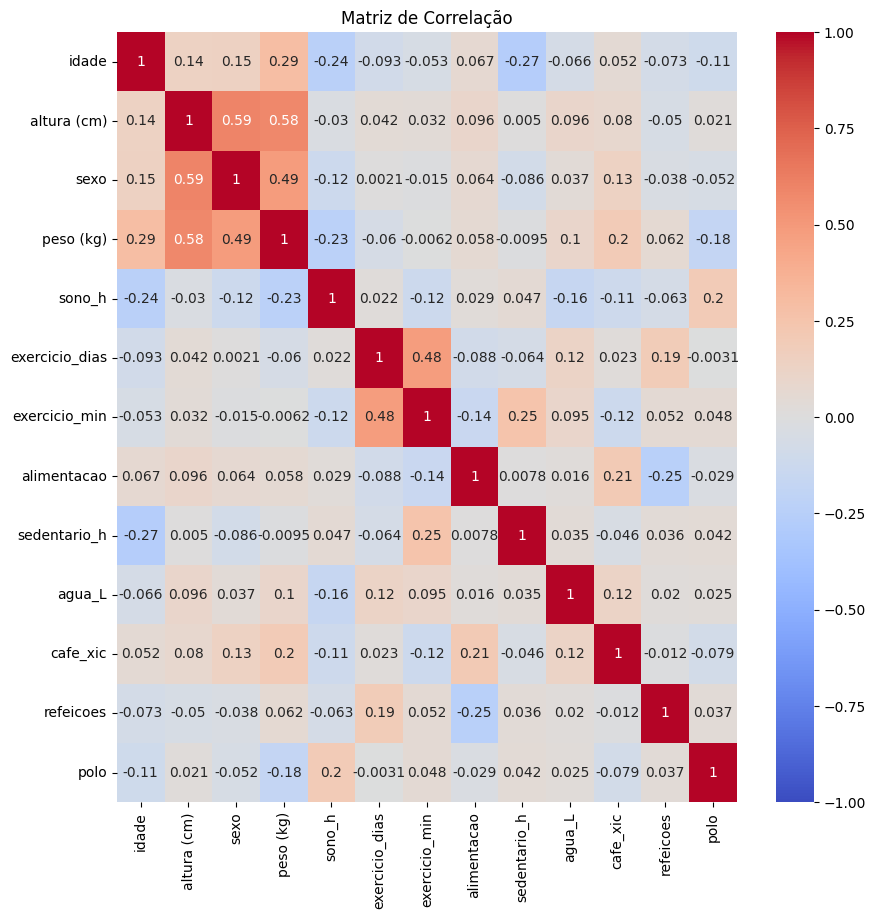

In [44]:
matriz_correlacao = dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

Visualizando a matriz de correlação, a variável peso tem forte correlação positiva com:
- idade
- altura
- sexo (não que faça sentido)
- Qtd Xic. Café

e forte correlação negativa com:
- horas de sono

Visualizando os gráficos de dispersão para cada variável explicativa

<Axes: xlabel='idade', ylabel='peso (kg)'>

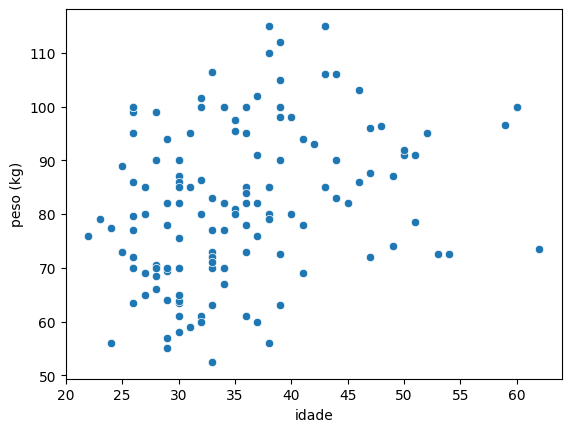

In [45]:
sns.scatterplot(x="idade", y="peso (kg)", data=dataframe)

<Axes: xlabel='altura (cm)', ylabel='peso (kg)'>

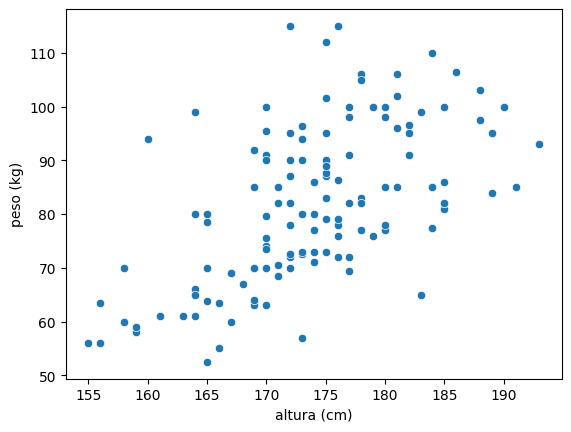

In [46]:
sns.scatterplot(x="altura (cm)", y="peso (kg)", data=dataframe)

<Axes: xlabel='sexo', ylabel='peso (kg)'>

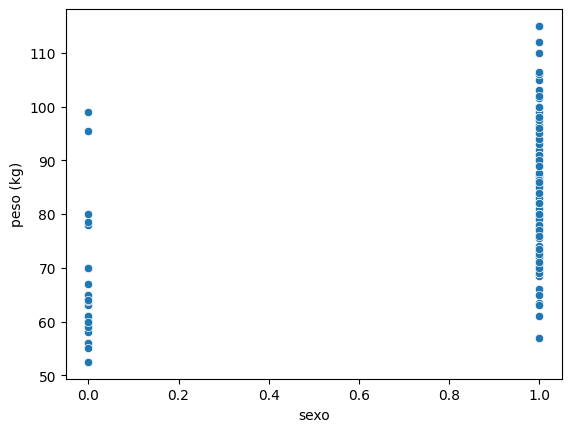

In [47]:
sns.scatterplot(x="sexo", y="peso (kg)", data=dataframe)

<Axes: xlabel='cafe_xic', ylabel='peso (kg)'>

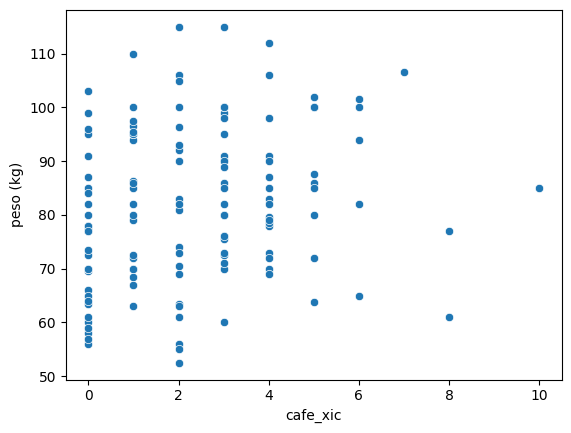

In [48]:
sns.scatterplot(x="cafe_xic", y="peso (kg)", data=dataframe)

<Axes: xlabel='sono_h', ylabel='peso (kg)'>

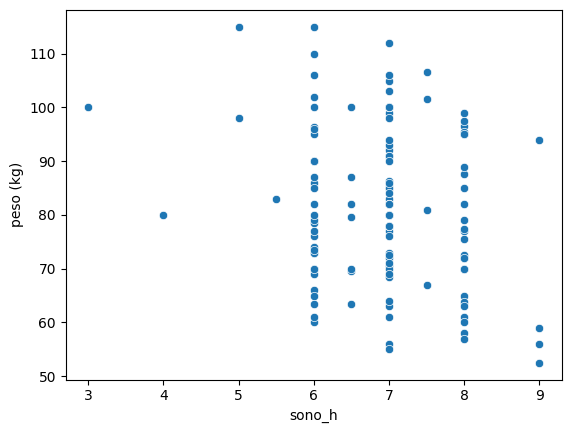

In [49]:
sns.scatterplot(x="sono_h", y="peso (kg)", data=dataframe)

### Divisão dos dados
Será feito através do holdout, com um loop de 30 vezes.

### Seleção de modelos
Serão utilizados o KNN, a árvore de decisão e a florestar aleatória.

### Métricas de avaliação
Será utilizada o MAE (Erro Absoluto Médio).

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


# No momento, escolhi não utilizar a variável sexo, visto que é uma variável categorica
X = dataframe[["altura (cm)", "idade", "cafe_xic", "sono_h"]]

# Variavel alvo
y = dataframe["peso (kg)"]

random_forest = RandomForestRegressor()

# Hiperparametros
param_grid_knn = {"n_neighbors": np.arange(1,31)}
param_grid_tree = {'max_depth': [2, 5, 10, 20]}
param_grid_rf = {"n_estimators": [10, 100, 300], 'max_depth': np.arange(20, 31, 2)}

results_mae_knn = []
results_mae_tree = []
results_mae_rf = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsRegressor()
    knn_grid = GridSearchCV(knn, param_grid_knn, n_jobs=-1)
    knn_grid.fit(X_train_scaled, y_train)
    y_pred_knn_grid = knn_grid.predict(X_test_scaled)
    mae_knn = mean_absolute_error(y_test, y_pred_knn_grid)
    results_mae_knn.append(mae_knn)

    tree = DecisionTreeRegressor()
    tree_grid = GridSearchCV(tree, param_grid_tree, n_jobs=-1)
    tree_grid.fit(X_train_scaled, y_train)
    y_pred_tree_grid = tree_grid.predict(X_test_scaled)
    mae_tree = mean_absolute_error(y_test, y_pred_tree_grid)
    results_mae_tree.append(mae_tree)

    random_forest = RandomForestRegressor()
    random_forest_grid = GridSearchCV(random_forest, param_grid_rf, n_jobs=-1)
    random_forest_grid.fit(X_train_scaled, y_train)
    y_pred_random_forest_grid = random_forest_grid.predict(X_test_scaled)
    mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest_grid)
    results_mae_rf.append(mae_random_forest)






In [53]:
print("MAE médio - KNN:", np.mean(results_mae_knn))
print("MAE médio - Tree:", np.mean(results_mae_tree))
print("MAE médio - Random Forest:", np.mean(results_mae_rf))

MAE médio - KNN: 10.187795930448406
MAE médio - Tree: 10.943643390053131
MAE médio - Random Forest: 10.41273846153846
